In [1]:
test_sequence = ['AATTCCGGATC', 'AATTCCGCATC', 'AATTCGGCATG', 'AATTCCGGGTG']
wild_type = 'AATTCCGGATC'
nucleotide_order = {'A': 0, 'T': 1, 'C': 2, 'G': 3}
sin_dou_index = set()
for i in range(len(wild_type)):
    first_index = nucleotide_order[wild_type[i]]+i*4
    sin_dou_index.add((first_index, first_index))
    for j in range(i+1, len(wild_type)):
        second_index = nucleotide_order[wild_type[j]]+j*4
        sin_dou_index.add((first_index, second_index))
print(sin_dou_index)

def compare(a, b):
    flag = 0
    mutate_index = []
    for i, (ca, cb) in enumerate(zip(a,b)):
        if ca!=cb:
            flag = 1
            mutate_index.append(i)
#     print(mutate_index)
    for i in mutate_index:
        for j in range(len(wild_type)):
            wild_val = nucleotide_order[wild_type[j]]+j*4
            mut_val = nucleotide_order[b[i]]+i*4
            if i == j:
                sin_dou_index.add((mut_val, mut_val))
            else:
                sin_dou_index.add((min(wild_val, mut_val), max(wild_val, mut_val)))

for sequence in test_sequence:
    compare(wild_type, sequence)
sin_dou_index = sorted(sin_dou_index)
with open('index_matrix.csv', 'w') as outfile:
#     for pair in sin_dou_index:
    for i in range(len(sin_dou_index)):
        outfile.write(str(sin_dou_index[i][0])+','+str(sin_dou_index[i][1])+','+str(i)+'\n')

{(13, 22), (0, 27), (18, 22), (32, 32), (13, 13), (4, 18), (18, 37), (31, 37), (9, 22), (13, 37), (4, 27), (22, 37), (27, 42), (32, 37), (4, 22), (27, 37), (9, 18), (9, 37), (4, 31), (22, 31), (31, 32), (13, 32), (4, 42), (0, 32), (4, 9), (31, 31), (37, 42), (4, 37), (22, 27), (4, 4), (18, 27), (4, 13), (0, 37), (0, 4), (18, 31), (31, 42), (18, 42), (27, 32), (0, 22), (9, 32), (0, 0), (0, 18), (32, 42), (9, 31), (27, 31), (22, 42), (9, 13), (18, 32), (9, 27), (27, 27), (37, 37), (22, 22), (42, 42), (0, 13), (9, 9), (13, 27), (9, 42), (13, 18), (0, 42), (0, 31), (18, 18), (0, 9), (13, 31), (13, 42), (22, 32), (4, 32)}


In [20]:
sorted((1,2))

[1, 2]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from matplotlib.lines import Line2D

"""Plot a line from slope and intercept"""
def abline(slope, intercept, color = 'red'):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, c = color)

N_sample = 1000000
x = np.random.uniform(0, 1,   N_sample)
y = np.random.uniform(0, 0.5, N_sample)

x_new = []
y_new = []
for i in range(len(x)):
    if y[i] < -0.5 * x[i] + 0.5:
        continue
    else:
        x_new.append(x[i])
        y_new.append(y[i])

plt.scatter(x_new, y_new, alpha = 0.01, c='b')
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(x_new), np.array(y_new))
abline(slope, intercept)
legend_elements = [Line2D([0], [0], color  = 'r', lw = 4, label = 'Fitted curve, y=-0.25x+0.5'),
                   Line2D([0], [0], marker = 'o', color = 'w', label = 'Data',
                          markerfacecolor = 'b', markersize = 10)]
plt.legend(handles = legend_elements)
plt.show()

<Figure size 640x480 with 1 Axes>

1.9920270279159622
0.5124546186058332
-3.0344356145843348


(-0.2, 1.2)

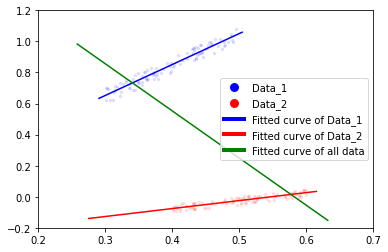

In [155]:
N_sample = 100
x_1 = np.random.uniform(0.3, 0.5,   N_sample)
y_1 = [2 * i + np.random.uniform(0, 0.1) for i in x_1]
color_1 = 'blue'
plt.scatter(x_1, y_1, c = color_1, alpha=0.1, s=5)
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(x_1), np.array(y_1))
abline(slope, intercept, color_1)
print(slope)

x_2 = np.random.uniform(0.4, 0.6,   N_sample)
y_2 = [0.5 * i + np.random.uniform(0, 0.05)-0.3 for i in x_2]
color_2 = 'red'
plt.scatter(x_2, y_2, c = color_2, alpha=0.1, s=5)
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(x_2), np.array(y_2))
abline(slope, intercept, color_2)
print(slope)

color_3 = 'green'
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(list(x_1)+list(x_2)), np.array(list(y_1)+list(y_2)))
abline(slope, intercept, color_3)
print(slope)

legend_elements = [Line2D([0], [0], marker = 'o', color = 'w', label = 'Data_1', markerfacecolor = 'b', markersize = 10),
                   Line2D([0], [0], marker = 'o', color = 'w', label = 'Data_2', markerfacecolor = 'r', markersize = 10),
                   Line2D([0], [0], color  = 'b', lw = 4, label = 'Fitted curve of Data_1'),
                   Line2D([0], [0], color  = 'r', lw = 4, label = 'Fitted curve of Data_2'),
                   Line2D([0], [0], color  = 'g', lw = 4, label = 'Fitted curve of all data')]
plt.legend(handles = legend_elements)
plt.xlim([0.2,0.7])
plt.ylim([-0.2,1.2])




1.9778339182383908
0.5019761510609851
1.645070143529629


(-0.2, 1.2)

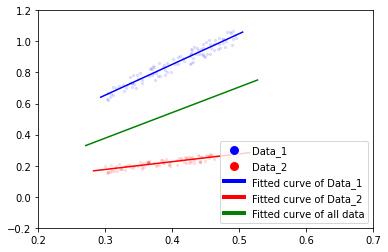

In [156]:
N_sample = 100
x_1 = np.random.uniform(0.3, 0.5,   N_sample)
y_1 = [2 * i + np.random.uniform(0, 0.1) for i in x_1]
color_1 = 'blue'
plt.scatter(x_1, y_1, c = color_1, alpha=0.1, s=5)
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(x_1), np.array(y_1))
abline(slope, intercept, color_1)
print(slope)

x_2 = np.random.uniform(0.3, 0.5,   N_sample)
y_2 = [0.5 * i + np.random.uniform(0, 0.05) for i in x_2]
color_2 = 'red'
plt.scatter(x_2, y_2, c = color_2, alpha=0.1, s=5)
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(x_2), np.array(y_2))
abline(slope, intercept, color_2)
print(slope)

color_3 = 'green'
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(list(x_1)+list(x_2)), np.array(list(y_1)+list(y_2)))
abline(slope, intercept, color_3)
print(slope)

legend_elements = [Line2D([0], [0], marker = 'o', color = 'w', label = 'Data_1', markerfacecolor = 'b', markersize = 10),
                   Line2D([0], [0], marker = 'o', color = 'w', label = 'Data_2', markerfacecolor = 'r', markersize = 10),
                   Line2D([0], [0], color  = 'b', lw = 4, label = 'Fitted curve of Data_1'),
                   Line2D([0], [0], color  = 'r', lw = 4, label = 'Fitted curve of Data_2'),
                   Line2D([0], [0], color  = 'g', lw = 4, label = 'Fitted curve of all data')]
plt.legend(handles = legend_elements)
plt.xlim([0.2,0.7])
plt.ylim([-0.2,1.2])



2.0929645901161704
0.5147660173215662
0.047404050555907996


(-0.2, 1.2)

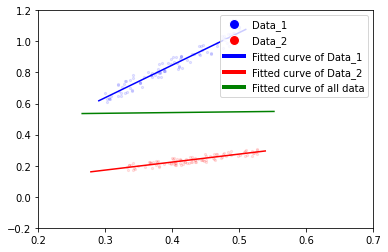

In [165]:
N_sample = 100
x_1 = np.random.uniform(0.3, 0.5,   N_sample)
y_1 = [2 * i + np.random.uniform(0, 0.1) for i in x_1]
color_1 = 'blue'
plt.scatter(x_1, y_1, c = color_1, alpha=0.1, s=5)
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(x_1), np.array(y_1))
abline(slope, intercept, color_1)
print(slope)

x_2 = np.random.uniform(0.33, 0.53,   N_sample)
y_2 = [0.5 * i + np.random.uniform(0, 0.05) for i in x_2]
color_2 = 'red'
plt.scatter(x_2, y_2, c = color_2, alpha=0.1, s=5)
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(x_2), np.array(y_2))
abline(slope, intercept, color_2)
print(slope)

color_3 = 'green'
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(list(x_1)+list(x_2)), np.array(list(y_1)+list(y_2)))
abline(slope, intercept, color_3)
print(slope)

legend_elements = [Line2D([0], [0], marker = 'o', color = 'w', label = 'Data_1', markerfacecolor = 'b', markersize = 10),
                   Line2D([0], [0], marker = 'o', color = 'w', label = 'Data_2', markerfacecolor = 'r', markersize = 10),
                   Line2D([0], [0], color  = 'b', lw = 4, label = 'Fitted curve of Data_1'),
                   Line2D([0], [0], color  = 'r', lw = 4, label = 'Fitted curve of Data_2'),
                   Line2D([0], [0], color  = 'g', lw = 4, label = 'Fitted curve of all data')]
plt.legend(handles = legend_elements)
plt.xlim([0.2,0.7])
plt.ylim([-0.2,1.2])

1.9410120535033566
0.5046381486403272
-0.7656090314883301


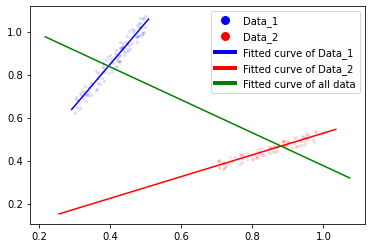

In [167]:
N_sample = 100
x_1 = np.random.uniform(0.3, 0.5,   N_sample)
y_1 = [2 * i + np.random.uniform(0, 0.1) for i in x_1]
color_1 = 'blue'
plt.scatter(x_1, y_1, c = color_1, alpha=0.1, s=5)
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(x_1), np.array(y_1))
abline(slope, intercept, color_1)
print(slope)

x_2 = np.random.uniform(0.7, 1,   N_sample)
y_2 = [0.5 * i + np.random.uniform(0, 0.05) for i in x_2]
color_2 = 'red'
plt.scatter(x_2, y_2, c = color_2, alpha=0.1, s=5)
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(x_2), np.array(y_2))
abline(slope, intercept, color_2)
print(slope)

color_3 = 'green'
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(list(x_1)+list(x_2)), np.array(list(y_1)+list(y_2)))
abline(slope, intercept, color_3)
print(slope)

legend_elements = [Line2D([0], [0], marker = 'o', color = 'w', label = 'Data_1', markerfacecolor = 'b', markersize = 10),
                   Line2D([0], [0], marker = 'o', color = 'w', label = 'Data_2', markerfacecolor = 'r', markersize = 10),
                   Line2D([0], [0], color  = 'b', lw = 4, label = 'Fitted curve of Data_1'),
                   Line2D([0], [0], color  = 'r', lw = 4, label = 'Fitted curve of Data_2'),
                   Line2D([0], [0], color  = 'g', lw = 4, label = 'Fitted curve of all data')]
plt.legend(handles = legend_elements)
# plt.xlim([0.2,0.7])
# plt.ylim([-0.2,1.2])

7.075700512290612
0.6157354907440243
-0.6077734940841254


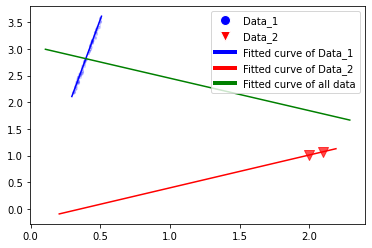

In [15]:
N_sample = 100
x_1 = np.random.uniform(0.3, 0.5,   N_sample)
y_1 = [7 * i + np.random.uniform(0, 0.1) for i in x_1]
color_1 = 'blue'
plt.scatter(x_1, y_1, c = color_1, alpha=0.1, s=5)
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(x_1), np.array(y_1))
abline(slope, intercept, color_1)
print(slope)

x_2 = [2,2.1]
y_2 = [0.5 * i + np.random.uniform(0, 0.05) for i in x_2]
color_2 = 'red'
plt.scatter(x_2, y_2, c = color_2, alpha=0.7, s=100, marker='v')
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(x_2), np.array(y_2))
abline(slope, intercept, color_2)
print(slope)

color_3 = 'green'
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(list(x_1)+list(x_2)), np.array(list(y_1)+list(y_2)))
abline(slope, intercept, color_3)
print(slope)

legend_elements = [Line2D([0], [0], marker = 'o', color = 'w', label = 'Data_1', markerfacecolor = 'b', markersize = 10),
                   Line2D([0], [0], marker = 'v', color = 'w', label = 'Data_2', markerfacecolor = 'r', markersize = 10),
                   Line2D([0], [0], color  = 'b', lw = 4, label = 'Fitted curve of Data_1'),
                   Line2D([0], [0], color  = 'r', lw = 4, label = 'Fitted curve of Data_2'),
                   Line2D([0], [0], color  = 'g', lw = 4, label = 'Fitted curve of all data')]
plt.legend(handles = legend_elements)
# plt.xlim([0.2,0.7])
# plt.ylim([-0.2,1.2])

In [172]:
import biopython

ModuleNotFoundError: No module named 'biopython'

In [193]:
# Install a pip package in the current Jupyter kernel
import sys

!{sys.executable} -m conda install bowtie2

/usr/local/opt/python/bin/python3.7: No module named conda


In [187]:
from Bio import pairwise2
from Bio import SeqIO
# from Bio.Align import substitution_matrices
# blosum62 = substitution_matrices.load("BLOSUM62")
seq1='AATTGTTTCCGG'
seq2='AATCGTTTCCGG'
# alignments = pairwise2.align.globalds(seq1.seq, seq2.seq, blosum62, -10, -0.5)
alignments = pairwise2.align.globalxx(seq1, seq2)
print(pairwise2.format_alignment(*alignments[0]))

AATT-GTTTCCGG
|| | ||||||||
AA-TCGTTTCCGG
  Score=11



In [2]:
import bowtie2

ModuleNotFoundError: No module named 'bowtie2'